### ML3 mini project - analyzing the National Health and Nutrition Examination Survey (NHANES) dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
from  sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [4]:
#pip install numpy --upgrade --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy
print(numpy.__version__)

2.1.3


In [5]:
# reading the data
data = pd.read_csv('ML3 data.csv')
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957


In [5]:
# shape
data.shape

(9813, 662)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 662 entries, SEQN to ar25
dtypes: float64(641), int64(21)
memory usage: 49.6 MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SEQN,9813.0,78644.559971,2938.592266,73557.000000,76092.000000,78643.000000,81191.000000,83731.000000
SDDSRVYR,9813.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000
RIDSTATR,9813.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
RIAGENDR,9813.0,1.507694,0.499966,1.000000,1.000000,2.000000,2.000000,2.000000
RIDAGEYR,9813.0,31.629573,24.397553,0.000000,10.000000,27.000000,52.000000,80.000000
...,...,...,...,...,...,...,...,...
ar21,9813.0,0.516211,5.099966,-9.905405,-2.849344,1.884456,5.003854,9.202594
ar22,9813.0,0.847771,7.074776,-9.646950,-8.087627,0.814447,8.079576,9.679657
ar23,9813.0,0.436837,5.891879,-9.329935,-6.434927,-0.763828,7.174353,8.967017
ar24,9813.0,-2.754273,5.608956,-9.574369,-7.405031,-4.263325,1.071647,9.944636


In [6]:
#  Initial Data Exploration : Check the shape of the DataFrame and the number of missing values
data.isnull().sum().sort_values(ascending=False).head(10)

DRQSDT5     9813
DRQSDT6     9809
DRQSDT12    9805
DRD370PQ    9803
DRD370JQ    9801
DRD350JQ    9797
DRQSDT10    9791
DRD370SQ    9786
DRQSDT11    9782
LBXEMA      9779
dtype: int64

In [10]:
# removing the null values
data.fillna(np.zeros,inplace=True)

In [11]:
data.isna().sum().sum()

0

In [12]:
data_num = data.select_dtypes(include=np.number)

In [13]:
data_num.shape

(9813, 49)

In [23]:
minmax = MinMaxScaler()
data_minmax = minmax.fit_transform(data_num)
data_minmax = pd.DataFrame(data_minmax,columns=data_num.columns)

In [24]:
data_minmax.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,SIALANG,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,0.000000,0.0,0.0,0.0,0.8625,0.75,0.500000,0.0,0.0,0.0,...,0.572529,0.739496,0.676068,0.039022,0.028437,0.788112,0.566159,0.454406,0.046246,0.838868
1,0.000098,0.0,0.0,0.0,0.6750,0.50,0.333333,0.0,0.0,0.0,...,0.128985,0.363287,0.528899,0.357854,0.474708,0.715705,0.846420,0.702402,0.400049,0.246392
2,0.000197,0.0,0.0,0.0,0.9000,0.50,0.333333,1.0,0.0,0.0,...,0.137813,0.000599,0.998608,0.900397,0.115053,0.903406,0.001080,0.721498,0.404762,0.323734
3,0.000295,0.0,0.0,0.0,0.1125,0.50,0.333333,0.0,0.0,0.0,...,0.139001,0.073864,0.498478,0.572942,0.030646,0.621250,0.068643,0.157677,0.270331,0.644082
4,0.000393,0.0,0.0,1.0,0.9125,0.50,0.333333,0.0,0.0,0.0,...,0.505114,0.051660,0.489660,0.693533,0.970940,0.748077,0.841092,0.137546,0.004190,0.522750


In [25]:
# elbow method to find the value of K
err = []
for i in range(2,16):
    km=KMeans(n_clusters=i,random_state=48)
    km.fit(data_minmax)
    err.append(km.inertia_)

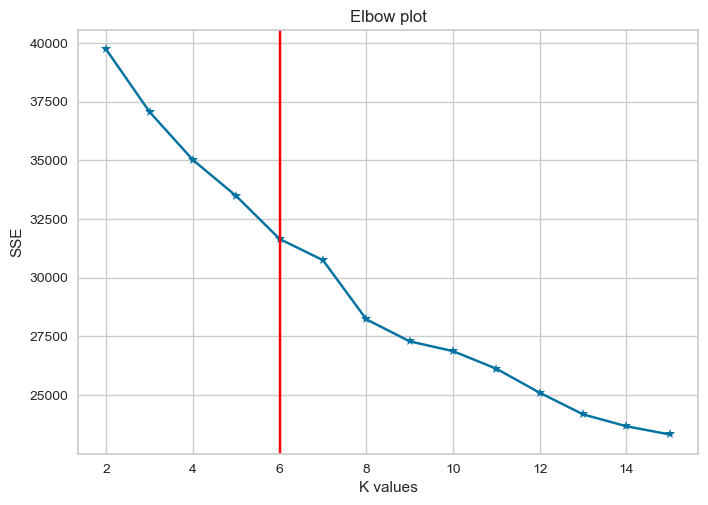

In [26]:
plt.plot(range(2,16),err,marker='*')
plt.axvline(x = 6, color = 'red')
plt.title('Elbow plot')
plt.xlabel('K values')
plt.ylabel('SSE')
plt.show()

We can see that before k=6 the plot is decreasing rapidly , after k=6 it is decreasing slowly 

The Silhouette score for 2 is 0.07837192572961996
The Silhouette score for 3 is 0.09252858202481987
The Silhouette score for 4 is 0.10660999590864798
The Silhouette score for 5 is 0.12076368860255798
The Silhouette score for 6 is 0.13178399507445596
The Silhouette score for 7 is 0.13922461948613968
The Silhouette score for 8 is 0.17257033064383476
The Silhouette score for 9 is 0.17809857540523652
The Silhouette score for 10 is 0.15793165598001355
The Silhouette score for 11 is 0.16364235457426674
The Silhouette score for 12 is 0.17638344028098923
The Silhouette score for 13 is 0.18514903919199363
The Silhouette score for 14 is 0.18280314566121142
The Silhouette score for 15 is 0.18521182520076612


Text(0, 0.5, 'Silhouette scores')

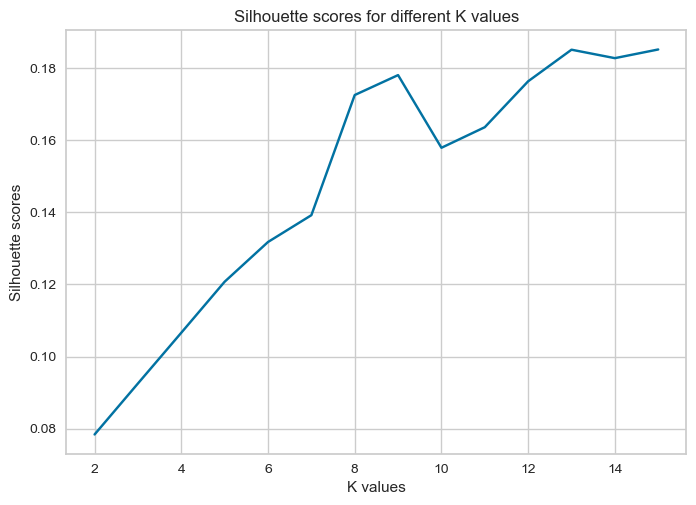

In [27]:
sil_scores = []
for i in range(2,16):
    km_sc=KMeans(n_clusters=i,random_state = 48)
    km_sc.fit(data_minmax)
    sc_labels = km_sc.labels_
    sc=silhouette_score(data_minmax,sc_labels)
    print("The Silhouette score for", i ,'is', sc)
    sil_scores.append(sc)
    
plt.plot(range(2,16),sil_scores)
plt.title('Silhouette scores for different K values')
plt.xlabel('K values')
plt.ylabel('Silhouette scores')

Tha value of K is maximum at 9 hence considering 9 clusters

In [28]:
km_sc1 = KMeans(n_clusters=9,random_state=48)
km_sc1.fit(data_minmax)

KMeans(n_clusters=9, random_state=48)

In [29]:
data_num['Clusters'] = km.fit_predict(data_minmax)

In [30]:
data_num.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,SIALANG,...,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25,Clusters
0,73557,8,2,1,69,4,4,1,1,1,...,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061,0
1,73558,8,2,1,54,3,3,1,1,1,...,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746,0
2,73559,8,2,1,72,3,3,2,1,1,...,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037,0
3,73560,8,2,1,9,3,3,1,1,1,...,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141,9
4,73561,8,2,2,73,3,3,1,1,1,...,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957,3


In [31]:
# Correlation Analysis : Analyze the correlation of features with the cluster labels to identify highly correlated features.
corr_matrix = data_num.corr()
corr_matrix.sort_values(by='Clusters',ascending=False).head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,SIALANG,...,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25,Clusters
Clusters,-0.016767,NaN,NaN,0.231819,-0.041522,-0.037380,-0.027892,-0.134637,0.022464,0.123519,...,0.129044,0.142426,0.160718,-0.294363,-0.121099,0.136063,0.035300,-0.021776,-0.044003,1.000000
ar6,0.009592,NaN,NaN,-0.192934,-0.068498,-0.062799,-0.043890,0.007013,-0.004250,0.123900,...,0.130986,0.124590,-0.058157,-0.311077,-0.442272,-0.021364,0.343204,-0.001054,-0.218539,0.366483
ar2,0.012814,NaN,NaN,-0.106966,0.145453,-0.084965,-0.080841,0.025296,0.035251,0.107789,...,0.233424,0.272286,0.034806,-0.207319,-0.152846,0.336453,0.330305,0.026452,-0.115188,0.251712
ar4,0.007816,NaN,NaN,0.054800,0.054955,0.010735,0.005483,-0.000321,-0.003821,-0.025969,...,0.174750,0.221915,-0.103040,-0.040697,-0.153135,0.159973,0.021875,0.257560,-0.024603,0.242649
RIAGENDR,-0.005682,NaN,NaN,1.000000,0.034235,-0.016195,-0.014006,0.014111,0.004183,0.008234,...,0.100140,0.100083,0.019325,0.175774,0.052649,0.186128,-0.125972,-0.101130,0.032133,0.231819


In [32]:
# Principal Component Analysis (PCA) : Perform PCA to reduce dimensionality while retaining 95% of the variance.
from sklearn.decomposition import PCA
pc=PCA(n_components=0.95)

In [33]:
data_pca = pc.fit_transform(data_num)

In [34]:
data_pca.shape

(9813, 2)

In [35]:
pd.DataFrame(pc.explained_variance_).round(2)*100

,0
0,2.481392e+11
1,3.243334e+10


In [36]:
km_pc = KMeans(n_clusters=5,random_state=48)
kmeans_pca = km_pc.fit(data_pca)

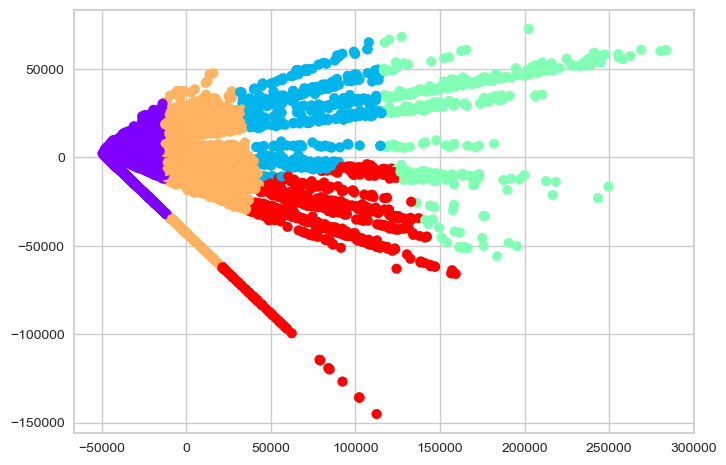

In [37]:
plt.scatter(data_pca[:,0],data_pca[:,1] ,c = kmeans_pca.labels_,cmap='rainbow')
plt.show()

In [38]:
#DBSCAN - DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5,min_samples=5)
db_labels = db.fit_predict(data_pca)

In [39]:
set(db_labels)
# DBSCAN resulted in a single cluster

{-1}

In [46]:
# evalulation of the cluster
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_minmax,km_pc.labels_)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data_minmax,km_pc.labels_)
print("Davies-Bouldin Index:", davies_bouldin)

Calinski-Harabasz Index: 95.5570716906889
Davies-Bouldin Index: 8.494640331418054
